**NAMA: Lisa Kristania**

**NIM: 202201058**

**PRODI : Sistem Informasi**

**Matkul : Artificial Intelligence**


1. Mengimpor library yang digunakan

In [1]:
#operasi numerik, manipulasi, visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#membagi data, standarisasi, naive bayes, confusion metrik dan warna visualisasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

2. Menyiapkan dan menampilkan data

In [2]:
#load dataset
dataset = pd.read_csv('heart_disease_uci.csv')

In [3]:
#menampilkan dataset
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


- karena Gaussian Naive Bayes tidak dapat memproses data yang mengandung missing value, maka saya menghapus missing value pada kolom(atribut) yang akan digunakan, yaitu pada kolom "chol".

In [4]:
#print missing value
print(dataset.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [5]:
#hapus missing value kolom chol
dataset = dataset.dropna(subset=['chol'])

Karena pada dataset saya kolom target(num) memiliki 4 kategori yaitu:
- 0 = tidak berpenyakit (sehat)
- 1–4 = memiliki penyakit jantung, dengan tingkat keparahan.

Disini saya akan mengubahnya  menjadi 2 kategori saja, yaitu tidak berpenyakit (0) dan berpenyakit (1)

In [6]:
#ubah label menjadi biner:0 = tidak sakit, 1= sakit
dataset['num'] = dataset['num'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
#dataset['num'] = dataset['num'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
#menampilkan jumlah dari setiap nilai di kolom num
print(dataset['num'].value_counts())

num
1    498
0    392
Name: count, dtype: int64


3. Menentukan dan membagi data

In [8]:
#data fitur dan data target
X = dataset[['age', 'chol']].values
y = dataset['num'].values

In [9]:
print(X)

[[ 63. 233.]
 [ 67. 286.]
 [ 67. 229.]
 ...
 [ 55. 223.]
 [ 58. 385.]
 [ 62. 254.]]


In [10]:
print(y)

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [11]:
#Bagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
print(X_train)

[[ 54. 309.]
 [ 59. 326.]
 [ 51. 295.]
 ...
 [ 56.   0.]
 [ 41. 336.]
 [ 65.   0.]]


In [13]:
print(y_train)

[0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0
 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1
 0 0 0 0 1 0 0 1 1 0 0 1 

In [14]:
print(X_test)

[[ 49. 265.]
 [ 59.   0.]
 [ 57. 232.]
 [ 60. 230.]
 [ 42. 209.]
 [ 45. 264.]
 [ 51.   0.]
 [ 36. 166.]
 [ 41. 237.]
 [ 44. 215.]
 [ 65. 236.]
 [ 41. 245.]
 [ 69. 234.]
 [ 44. 288.]
 [ 33. 298.]
 [ 52. 199.]
 [ 41. 250.]
 [ 47. 243.]
 [ 53.   0.]
 [ 62. 220.]
 [ 58. 240.]
 [ 62. 170.]
 [ 64. 244.]
 [ 61. 207.]
 [ 33. 246.]
 [ 36. 340.]
 [ 48. 329.]
 [ 59. 288.]
 [ 68. 254.]
 [ 57.   0.]
 [ 58. 318.]
 [ 57. 347.]
 [ 50. 254.]
 [ 54. 266.]
 [ 36. 267.]
 [ 56.   0.]
 [ 74. 258.]
 [ 53. 300.]
 [ 61.   0.]
 [ 35. 264.]
 [ 42.   0.]
 [ 70.   0.]
 [ 47. 248.]
 [ 66.   0.]
 [ 52. 196.]
 [ 34. 182.]
 [ 60.   0.]
 [ 34. 161.]
 [ 61. 283.]
 [ 60. 240.]
 [ 61.   0.]
 [ 60. 258.]
 [ 62. 153.]
 [ 50. 231.]
 [ 63. 177.]
 [ 60.   0.]
 [ 64. 263.]
 [ 51. 160.]
 [ 54. 202.]
 [ 57. 236.]
 [ 51. 305.]
 [ 50. 341.]
 [ 49. 206.]
 [ 65.   0.]
 [ 63. 254.]
 [ 65.   0.]
 [ 43.   0.]
 [ 61.   0.]
 [ 57. 255.]
 [ 62. 139.]
 [ 35. 308.]
 [ 57.   0.]
 [ 44. 233.]
 [ 51. 308.]
 [ 62. 210.]
 [ 56. 100.]
 [ 66. 226.]

In [15]:
print(y_test)

[1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1
 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1
 0]


In [16]:
#Standarisasi (agar skala data seragam)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(X_train)

[[ 0.04302974  0.97284318]
 [ 0.5725655   1.12498536]
 [-0.27469171  0.84754962]
 ...
 [ 0.25484405 -1.79256469]
 [-1.33376324  1.21448076]
 [ 1.20800842 -1.79256469]]


In [18]:
print(X_test)

[[-0.48650602  0.57906342]
 [ 0.5725655  -1.79256469]
 [ 0.3607512   0.2837286 ]
 [ 0.67847266  0.26582952]
 [-1.22785609  0.07788918]
 [-0.91013463  0.57011388]
 [-0.27469171 -1.79256469]
 [-1.863299   -0.30694105]
 [-1.33376324  0.3284763 ]
 [-1.01604178  0.13158642]
 [ 1.20800842  0.31952676]
 [-1.33376324  0.40007262]
 [ 1.63163703  0.30162768]
 [-1.01604178  0.78490284]
 [-2.18102046  0.87439824]
 [-0.16878456 -0.01160623]
 [-1.33376324  0.44482032]
 [-0.69832032  0.38217354]
 [-0.06287741 -1.79256469]
 [ 0.89028696  0.17633412]
 [ 0.46665835  0.35532492]
 [ 0.89028696 -0.27114289]
 [ 1.10210127  0.39112308]
 [ 0.78437981  0.0599901 ]
 [-2.18102046  0.40902216]
 [-1.863299    1.25027892]
 [-0.59241317  1.15183398]
 [ 0.5725655   0.78490284]
 [ 1.52572988  0.48061848]
 [ 0.3607512  -1.79256469]
 [ 0.46665835  1.05338904]
 [ 0.3607512   1.3129257 ]
 [-0.38059887  0.48061848]
 [ 0.04302974  0.58801296]
 [-1.863299    0.5969625 ]
 [ 0.25484405 -1.79256469]
 [ 2.16117279  0.51641664]
 

In [19]:
#Model Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

4. Prediksi dan akurasi

In [20]:
#Prediksi
y_pred = classifier.predict(X_test)

In [21]:
#Evaluasi Akurasi
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Tingkat Akurasi:", accuracy_score(y_test, y_pred) * 100, "%")

Confusion Matrix:
 [[66 19]
 [69 69]]
Accuracy Score: 0.6053811659192825
Tingkat Akurasi: 60.53811659192825 %


5. Visualisasi

<ipython-input-22-5f461cd7b206>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


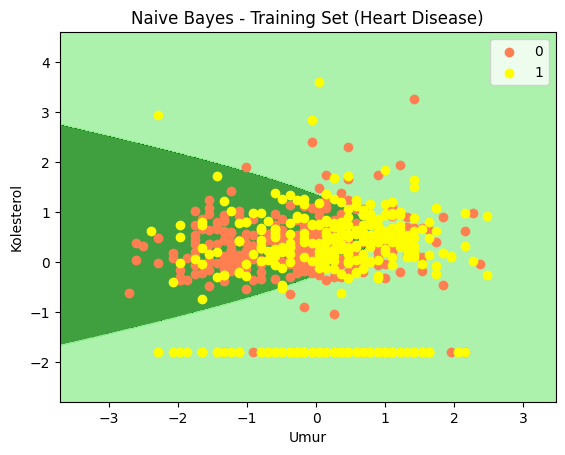

In [22]:
# Visualisasi Data Training
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('coral', 'yellow'))(i), label=j)
plt.title('Naive Bayes - Training Set (Heart Disease)')
plt.xlabel('Umur')
plt.ylabel('Kolesterol')
plt.legend()
plt.show()


<ipython-input-23-f911cbbb07bb>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


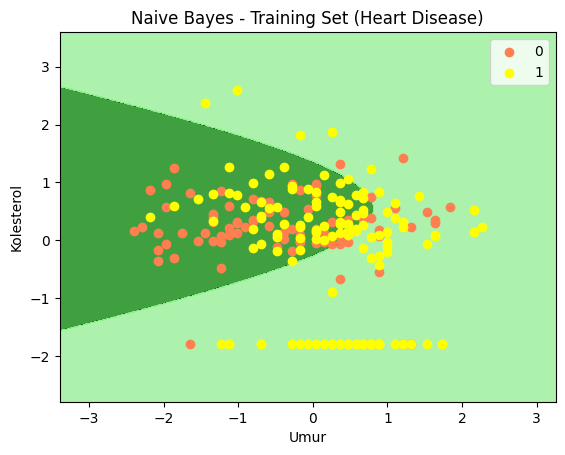

In [23]:
# Visualisasi Data Test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('coral', 'yellow'))(i), label=j)
plt.title('Naive Bayes - Training Set (Heart Disease)')
plt.xlabel('Umur')
plt.ylabel('Kolesterol')
plt.legend()
plt.show()


Kesimpulan:

1. Berdasarkan hasil analisis menggunakan Naive Bayes dengan fitur umur (age) dan kadar kolestrol (Chol),diperoleh model yang mampu memprediksi penyakit jantung dengan tingkat akurasi sebesar 60,54%.

2. Confusion matrix menunjukkan bahwa dari total data yang diuji, model klasifikasi memberikan hasil sebagai berikut:
  - 66 data negatif (tidak sakit) berhasil diprediksi dengan benar (True Negative)
  - 69 data positif (sakit) berhasil diprediksi dengan benar (True Positive)
  -  19 data negatif (tidak sakit) salah diprediksi sebagai positif (sakit) (False Positive)
  - 69 data positif (sakit) salah diprediksi sebagai negatif (tidak sakit) (False Negative)

3.  Visualisasi data menunjukkan bagaimana model tersebut dapat memisahkan data pasien ke dalam kelas sehat dan sakit berdasarkan umur dan kadar kolesterol, meskipun masih terdapat kesalahan klasifikasi